In [1]:
import os
import shutil
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:

#this_file_dir = os.path.dirname(os.path.abspath(__file__))
this_file_dir = "/home/mamitsu/Github/synthetic_verification"

use_dir = "/cross_val/"
use_path = this_file_dir + use_dir
results_dir = "/results/"
results_path = use_path + results_dir
results = pd.read_csv(results_path+"evaluation_all.csv")
dpi=300

In [7]:
results["amount_of_data"] = results["row_num"] * results["col_num"]
results["diff_Logistic/Linear"] = results["new_r2/accuracy_Logistic/Linear"] -  results["raw_r2/accuracy_Logistic/Linear"]
results["diff_GradientBoosting"] = results["new_r2/accuracy_GradientBoosting"] -  results["raw_r2/accuracy_GradientBoosting"]

In [11]:
results

,model,use_data,row_num,col_num,fit_time,size,data_kind,raw_r2/accuracy_Logistic/Linear,new_r2/accuracy_Logistic/Linear,raw_r2/accuracy_GradientBoosting,new_r2/accuracy_GradientBoosting,amount_of_data,diff_Logistic/Linear,diff_GradientBoosting
0,GaussianCopula,molecular_biology_promoters,85,58,13.358941,66542.0,B,0.570996,0.661472,0.604004,0.623810,4930,0.090476,0.019805
1,CTGAN,molecular_biology_promoters,85,58,19.285100,1767442.2,B,0.570996,0.546753,0.604004,0.528571,4930,-0.024242,-0.075433
2,CopulaGAN,molecular_biology_promoters,85,58,29.397083,1806823.0,B,0.570996,0.368831,0.604004,0.480087,4930,-0.202165,-0.123918
3,TVAE,molecular_biology_promoters,85,58,14.022739,435918.0,B,0.570996,0.706926,0.604004,0.783550,4930,0.135931,0.179545
4,GaussianCopula,car,1383,7,2.017419,7758.6,M,0.622659,0.485532,0.586912,0.394104,9681,-0.137127,-0.192808
5,CTGAN,car,1383,7,7.125853,996367.4,M,0.622659,0.640545,0.586912,0.594263,9681,0.017886,0.007352
6,CopulaGAN,car,1383,7,8.795543,1003935.4,M,0.622659,0.694436,0.586912,0.635336,9681,0.071777,0.048424
7,TVAE,car,1383,7,6.945385,170176.0,M,0.622659,0.670123,0.586912,0.723944,9681,0.047464,0.137032
8,GaussianCopula,542_pollution,48,16,2.968854,14468.8,R,-1.876173,-0.772015,-0.685161,0.199200,768,1.104158,0.884361
9,CTGAN,542_pollution,48,16,5.824620,719202.2,R,-1.876173,-3.076669,-0.685161,-1.805414,768,-1.200495,-1.120253


In [9]:
models_name = ["GaussianCopula","CTGAN","CopulaGAN","TVAE"]
#models_name = ["GaussianCopula", "CTGAN"]

In [10]:
results_c = results.query("data_kind=='B' or data_kind=='M'")
results_r = results.query("data_kind=='R'")


# モデルごとの結果
results_model = []
results_model_c = []
results_model_r = []

len_models = len(models_name)
for i in range(len_models):
    results_ = results.query("model==@models_name[@i]")
    results_model.append(results_)
    results_c_ = results_c.query("model==@models_name[@i]")
    results_model_c.append(results_c_)
    results_r_ = results_r.query("model==@models_name[@i]")
    results_model_r.append(results_r_)

In [12]:
fig_path = results_path + "/fig/"

os.makedirs(fig_path, exist_ok=True)

<Figure size 1440x1440 with 0 Axes>

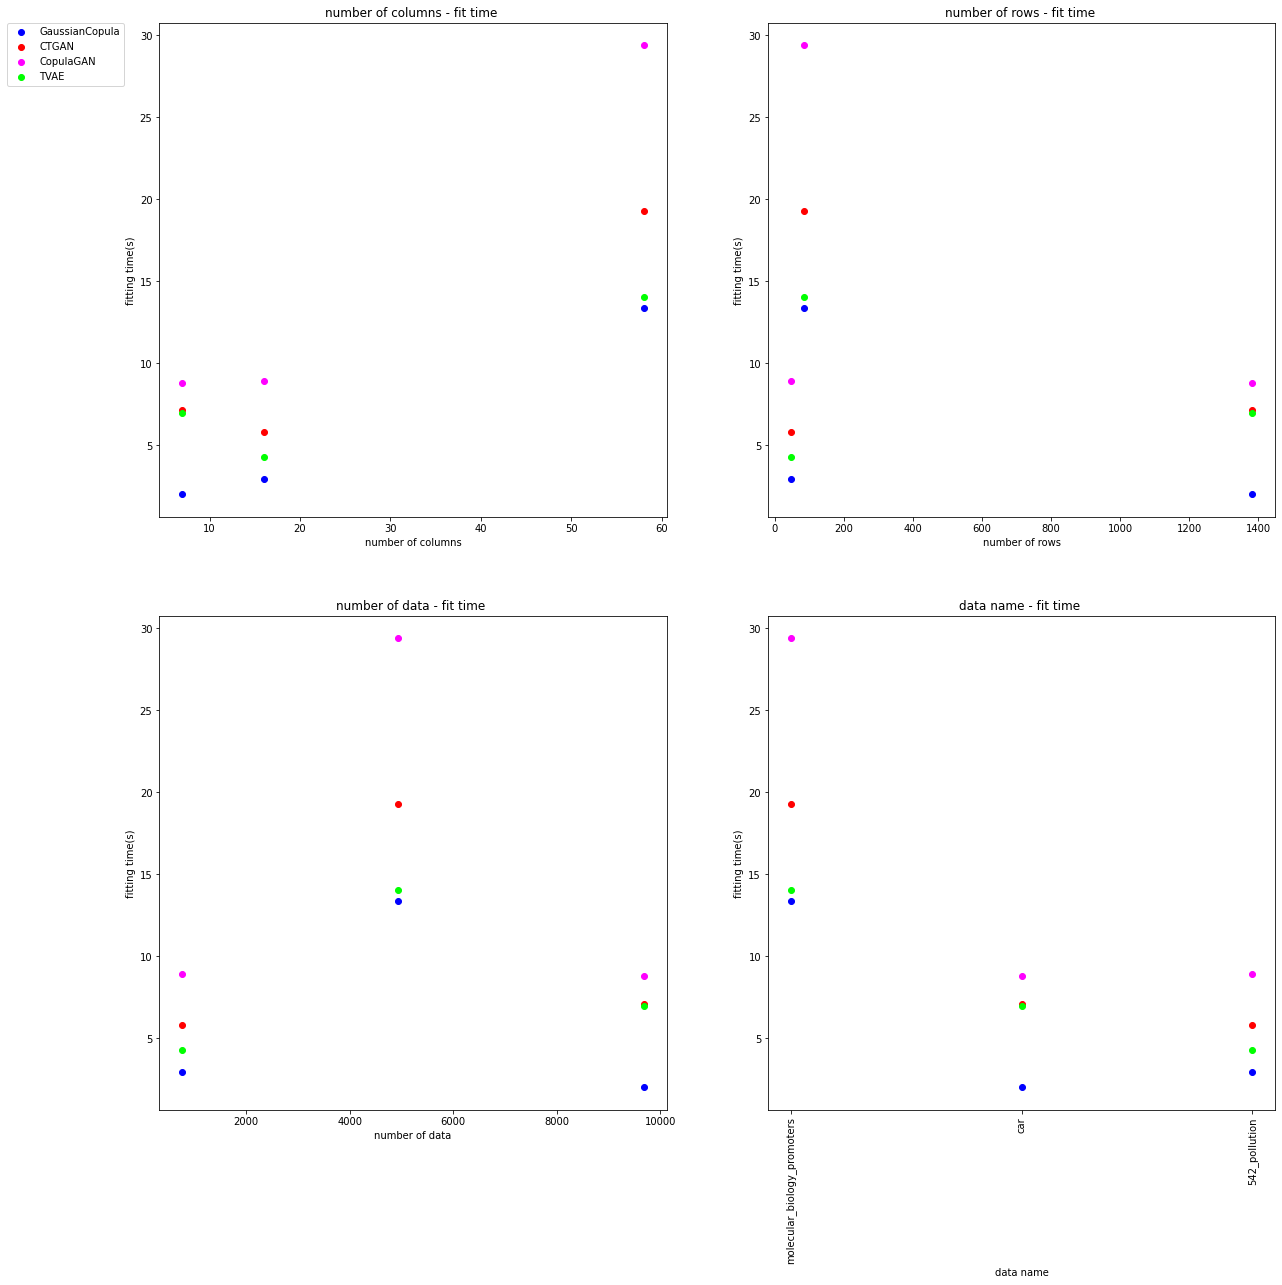

In [13]:
# 計算時間の表

marker_list = ["o","o","o","o"]
c_list = ["#0000FF","#FF0000","#FF00FF","#00FF00"]
plt_num = (2,2)  # subplots_num
plt.rcParams["figure.figsize"]=[20,20]
plt.subplots_adjust(wspace=0.4, hspace=0.6)
fig, ax = plt.subplots(plt_num[0],plt_num[1])

# figごとにまとめる
use_col_fig = [["col_num","row_num"],["amount_of_data", "use_data"]]
name_fig = [["number of columns", "number of rows"],["number of data","data name"]]
for p in range(plt_num[0]):
    for q in range(plt_num[1]):
        
        
        
        for i in range(len_models):
            ax[p,q].scatter(results_model[i][use_col_fig[p][q]], results_model[i]["fit_time"], label=models_name[i], \
                    marker=marker_list[i], c=c_list[i])

        ax[p,q].set_title("{} - fit time ".format(name_fig[p][q]))
        ax[p,q].set_xlabel("{}".format(name_fig[p][q]))
        ax[p,q].set_ylabel("fitting time(s)")
        if p==0 and q==0:
            ax[p,q].legend(bbox_to_anchor=(-0.3, 1), loc="upper left",borderaxespad=0)
        if p==1 and q==1:
            ax[p,q].tick_params(axis='x', labelrotation=90)

#plt.show()
plt.savefig(fig_path+"fit_time.png", format="png",dpi=dpi)

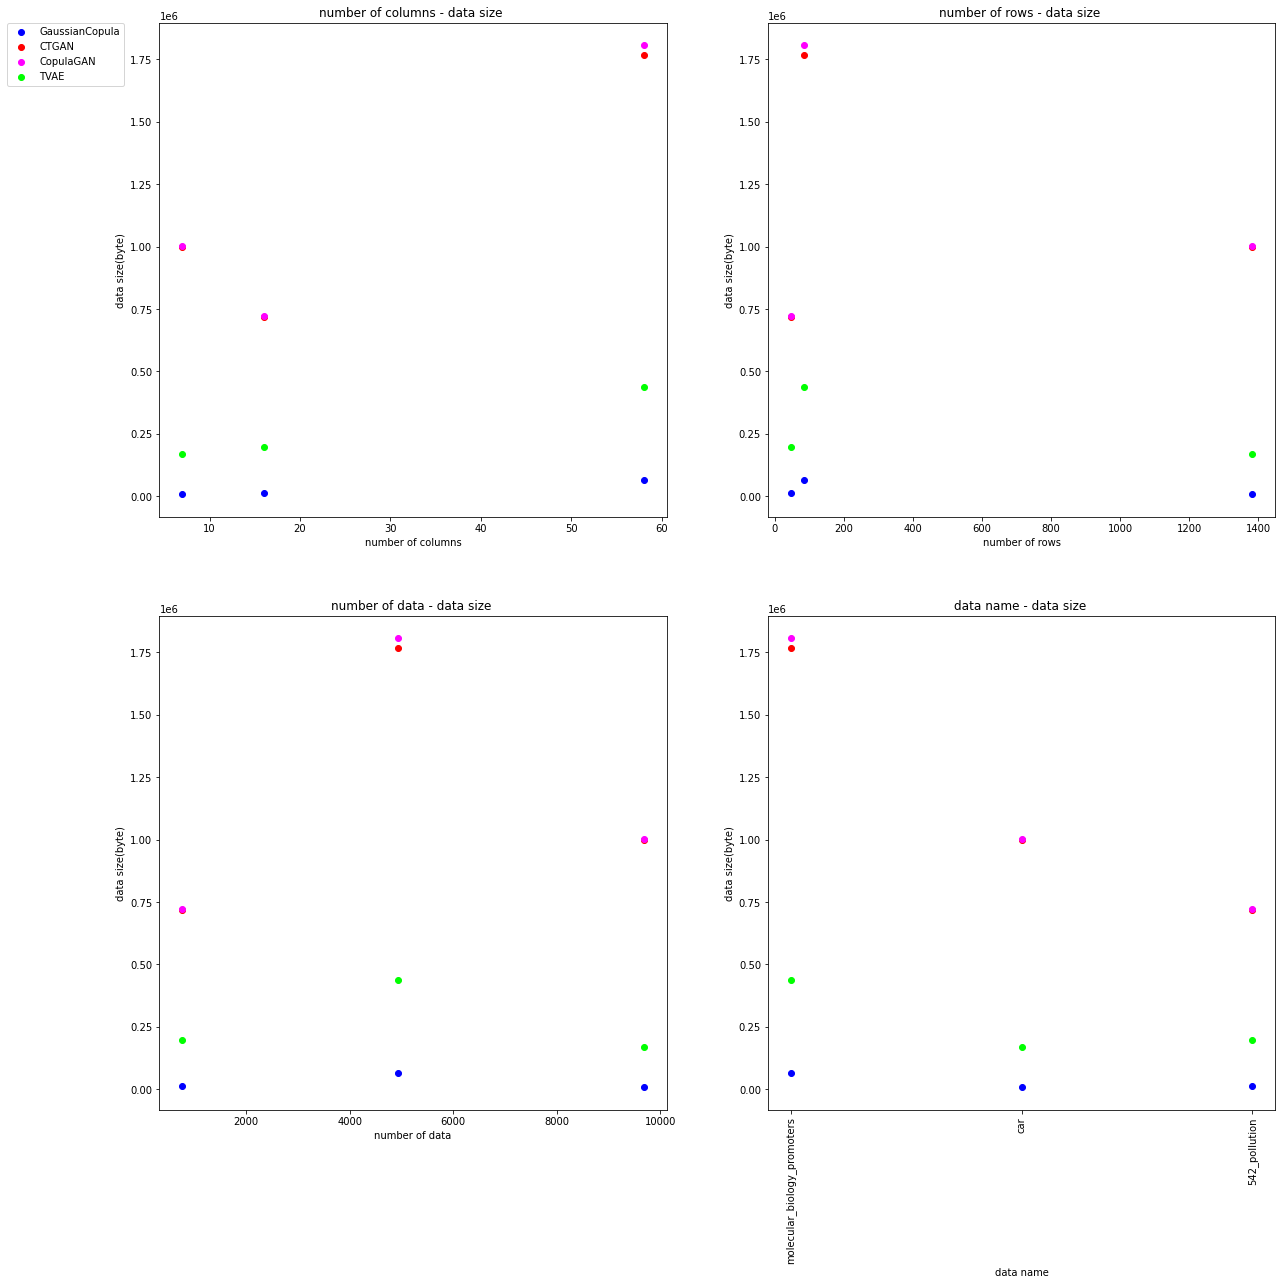

In [14]:
# データサイズの表

marker_list = ["o","o","o","o"]
c_list = ["#0000FF","#FF0000","#FF00FF","#00FF00"]
plt_num = (2,2)  # subplots_num
#plt.rcParams["figure.figsize"]=[30,10]

fig, ax = plt.subplots(plt_num[0],plt_num[1])

# figごとにまとめる
use_col_fig = [["col_num","row_num"],["amount_of_data", "use_data"]]
name_fig = [["number of columns", "number of rows"],["number of data","data name"]]
for p in range(plt_num[0]):
    for q in range(plt_num[1]):
        
        
        
        for i in range(len_models):
            ax[p,q].scatter(results_model[i][use_col_fig[p][q]], results_model[i]["size"], label=models_name[i], \
                    marker=marker_list[i], c=c_list[i])

        ax[p,q].set_title("{} - data size ".format(name_fig[p][q]))
        ax[p,q].set_xlabel("{}".format(name_fig[p][q]))
        ax[p,q].set_ylabel("data size(byte)")
        if p==0 and q==0:
            ax[p,q].legend(bbox_to_anchor=(-0.3, 1), loc="upper left",borderaxespad=0)
        # use_dataの時、x軸のラベルを回転
        if p==1 and q==1:
            ax[p,q].tick_params(axis='x', labelrotation=90)

#plt.show()
plt.savefig(fig_path+"data_size.png", format="png",dpi=dpi)

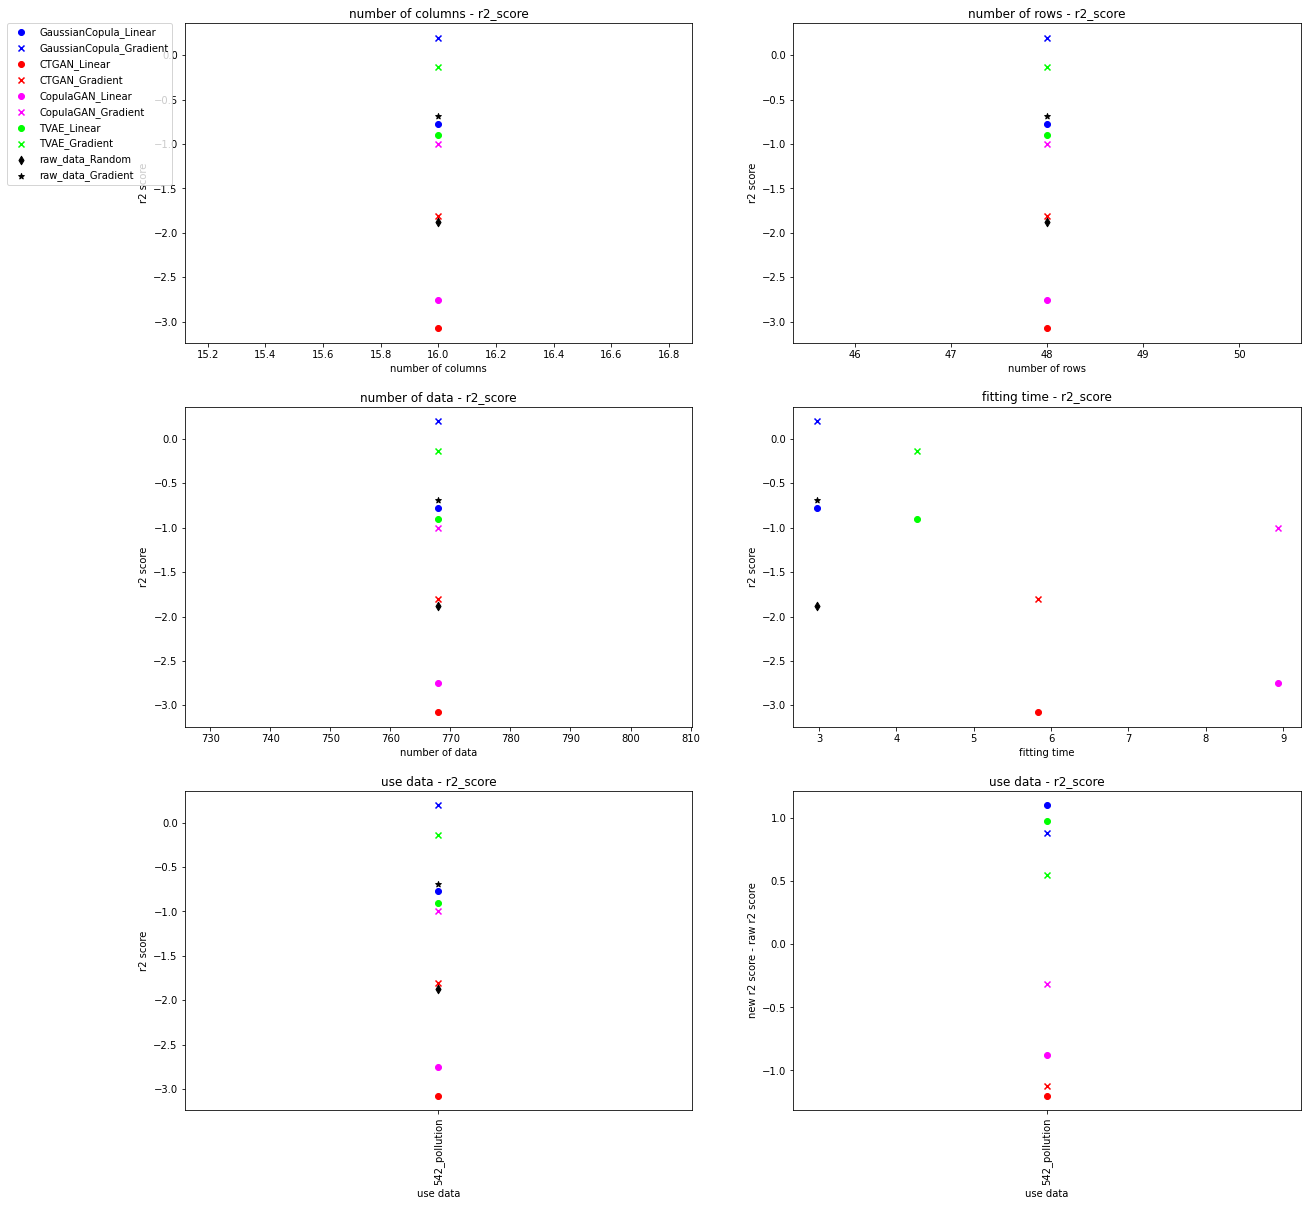

In [22]:

# 機械学習スコアの表
# r2 score
marker_list = ["o","o","o","o"]
marker_list2 = ["x","x","x","x"]
c_list = ["#0000FF","#FF0000","#FF00FF","#00FF00"]

plt.rcParams["figure.figsize"]=[20,20]

plt_num = (3,2)  # subplots_num
fig, ax = plt.subplots(plt_num[0],plt_num[1])

# figごとにまとめる
use_col_fig = [["col_num","row_num"],["amount_of_data", "fit_time"],["use_data","use_data"]]
name_fig = [["number of columns", "number of rows"],["number of data","fitting time"],["use data", "use data"]]
for p in range(plt_num[0]):
    for q in range(plt_num[1]):

        if p==2 and q==1:
            for i in range(len_models):
                ax[p,q].scatter(results_model_r[i][use_col_fig[p][q]], results_model_r[i]["diff_Logistic/Linear"], \
                label=models_name[i]+"_Linear", \
                    marker=marker_list[i],c=c_list[i])
                ax[p,q].scatter(results_model_r[i][use_col_fig[p][q]], results_model_r[i]["diff_GradientBoosting"], \
                    label=models_name[i]+"_Gradient", \
                        marker=marker_list2[i], c=c_list[i])
        else: 
            for i in range(len_models):
                ax[p,q].scatter(results_model_r[i][use_col_fig[p][q]], results_model_r[i]["new_r2/accuracy_Logistic/Linear"], \
                    label=models_name[i]+"_Linear", \
                        marker=marker_list[i],c=c_list[i])
                ax[p,q].scatter(results_model_r[i][use_col_fig[p][q]], results_model_r[i]["new_r2/accuracy_GradientBoosting"], \
                    label=models_name[i]+"_Gradient", \
                        marker=marker_list2[i], c=c_list[i])

            ax[p,q].scatter(results_model_r[0][use_col_fig[p][q]], results_model_r[0]["raw_r2/accuracy_Logistic/Linear"], label="raw_data_Random", \
            marker="d", c="#000000")
            ax[p,q].scatter(results_model_r[0][use_col_fig[p][q]], results_model_r[0]["raw_r2/accuracy_GradientBoosting"], label="raw_data_Gradient", \
            marker="*", c="#000000")

        ax[p,q].set_title("{} - r2_score".format(name_fig[p][q]))
        ax[p,q].set_xlabel("{}".format(name_fig[p][q]))
        if p==2 and q==1:
            ax[p,q].set_ylabel("new r2 score - raw r2 score")
        else:
            ax[p,q].set_ylabel("r2 score")
        if p==0 and q==0:
            ax[p,q].legend(bbox_to_anchor=(-0.35, 1), loc="upper left",borderaxespad=0)
        # use_dataの時、x軸のラベルを回転
        if p==2 and (q==0 or q==1):
            ax[p,q].tick_params(axis='x', labelrotation=90)


#plt.rcParams["figure.figsize"]=[20,10]
#plt.show()
plt.savefig(fig_path+"r2_score_linear.png", format="png",dpi=dpi)

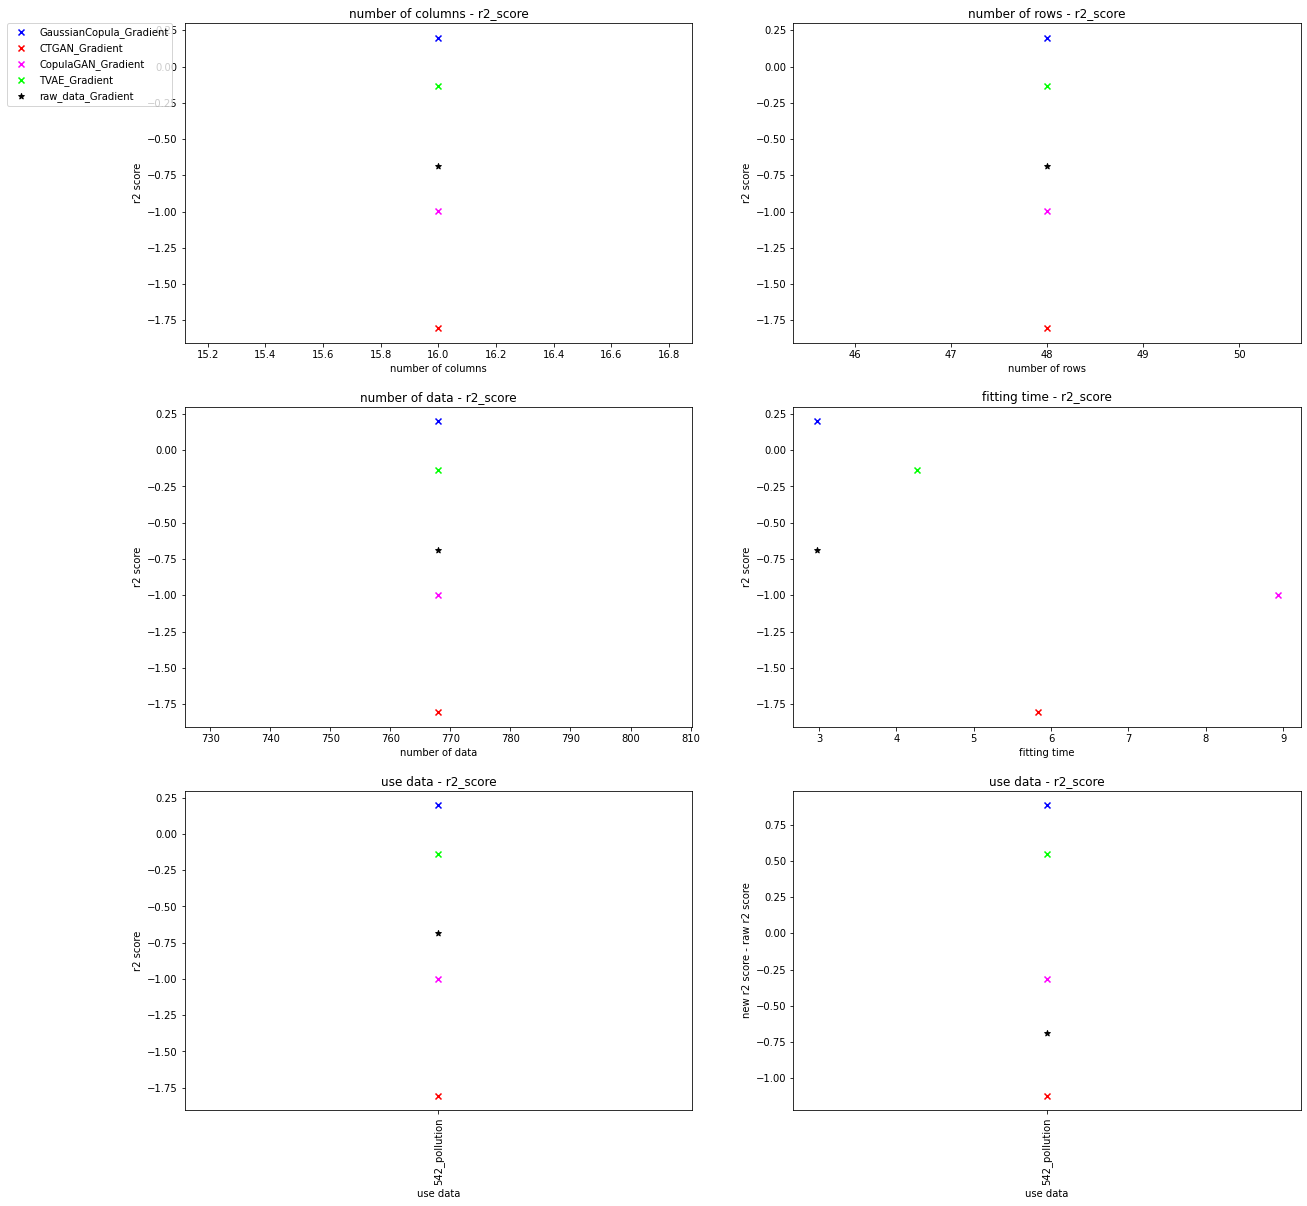

In [19]:

# 機械学習スコアの表
# r2 score
marker_list = ["o","o","o","o"]
marker_list2 = ["x","x","x","x"]
c_list = ["#0000FF","#FF0000","#FF00FF","#00FF00"]


plt_num = (3,2)  # subplots_num
fig, ax = plt.subplots(plt_num[0],plt_num[1])

# figごとにまとめる
use_col_fig = [["col_num","row_num"],["amount_of_data", "fit_time"],["use_data","use_data"]]
name_fig = [["number of columns", "number of rows"],["number of data","fitting time"],["use data", "use data"]]
for p in range(plt_num[0]):
    for q in range(plt_num[1]):

        if p==2 and q==1:
            for i in range(len_models):
                ax[p,q].scatter(results_model_r[i][use_col_fig[p][q]], results_model_r[i]["diff_GradientBoosting"], \
                    label=models_name[i]+"_Gradient", \
                        marker=marker_list2[i], c=c_list[i])
        else:
            
            for i in range(len_models):
                ax[p,q].scatter(results_model_r[i][use_col_fig[p][q]], results_model_r[i]["new_r2/accuracy_GradientBoosting"], \
                    label=models_name[i]+"_Gradient", \
                        marker=marker_list2[i], c=c_list[i])

        ax[p,q].scatter(results_model_r[0][use_col_fig[p][q]], results_model_r[0]["raw_r2/accuracy_GradientBoosting"], label="raw_data_Gradient", \
        marker="*", c="#000000")

        ax[p,q].set_title("{} - r2_score".format(name_fig[p][q]))
        ax[p,q].set_xlabel("{}".format(name_fig[p][q]))
        if p==2 and q==1:
            ax[p,q].set_ylabel("new r2 score - raw r2 score")
        else:
            ax[p,q].set_ylabel("r2 score")
        if p==0 and q==0:
            ax[p,q].legend(bbox_to_anchor=(-0.35, 1), loc="upper left",borderaxespad=0)
        # use_dataの時、x軸のラベルを回転
        if p==2 and (q==0 or q==1):
            ax[p,q].tick_params(axis='x', labelrotation=90)


#plt.rcParams["figure.figsize"]=[20,10]
#plt.show()
plt.savefig(fig_path+"r2_score_gradient.png", format="png",dpi=dpi)

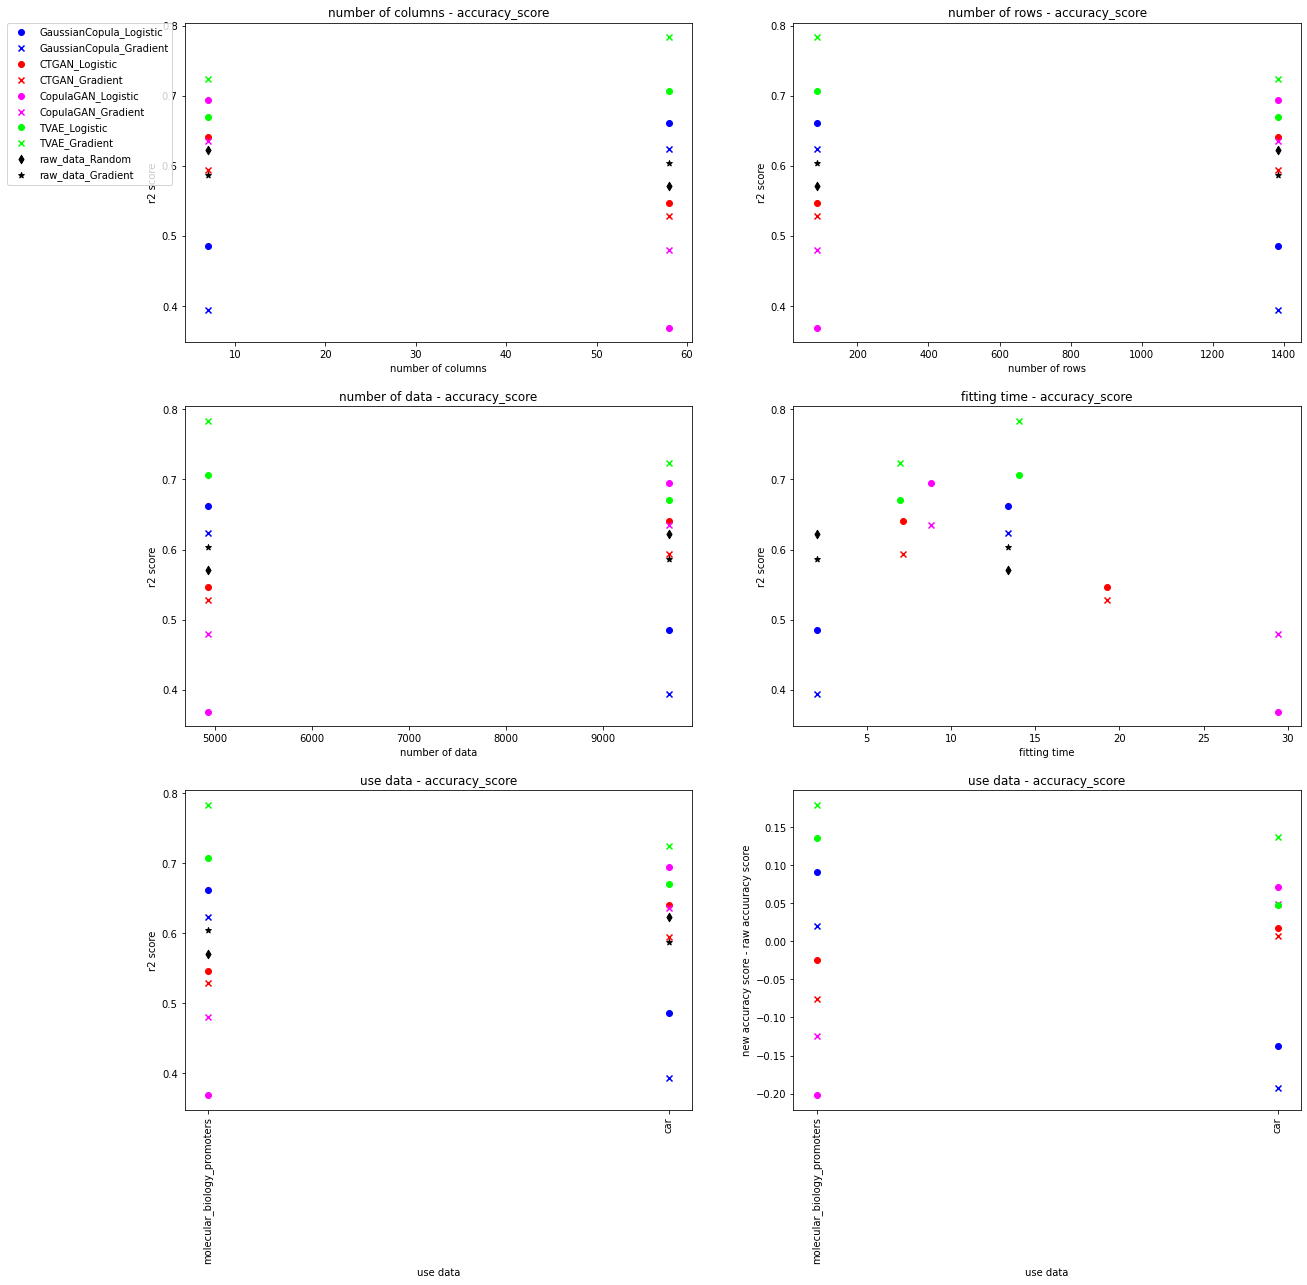

In [23]:
# 機械学習スコアの表
# accuracy score
marker_list = ["o","o","o","o"]
marker_list2 = ["x","x","x","x"]
c_list = ["#0000FF","#FF0000","#FF00FF","#00FF00"]

plt.rcParams["figure.figsize"]=[20,20]

plt_num = (3,2)  # subplots_num
fig, ax = plt.subplots(plt_num[0],plt_num[1])

# figごとにまとめる
use_col_fig = [["col_num","row_num"],["amount_of_data", "fit_time"],["use_data","use_data"]]
name_fig = [["number of columns", "number of rows"],["number of data","fitting time"],["use data", "use data"]]
for p in range(plt_num[0]):
    for q in range(plt_num[1]):

        if p==2 and q==1:
            for i in range(len_models):
                ax[p,q].scatter(results_model_c[i][use_col_fig[p][q]], results_model_c[i]["diff_Logistic/Linear"], \
                label=models_name[i]+"_Logistic", \
                    marker=marker_list[i],c=c_list[i])
                ax[p,q].scatter(results_model_c[i][use_col_fig[p][q]], results_model_c[i]["diff_GradientBoosting"], \
                    label=models_name[i]+"_Gradient", \
                        marker=marker_list2[i], c=c_list[i])
        else: 
            for i in range(len_models):
                ax[p,q].scatter(results_model_c[i][use_col_fig[p][q]], results_model_c[i]["new_r2/accuracy_Logistic/Linear"], \
                    label=models_name[i]+"_Logistic", \
                        marker=marker_list[i],c=c_list[i])
                ax[p,q].scatter(results_model_c[i][use_col_fig[p][q]], results_model_c[i]["new_r2/accuracy_GradientBoosting"], \
                    label=models_name[i]+"_Gradient", \
                        marker=marker_list2[i], c=c_list[i])

            ax[p,q].scatter(results_model_c[0][use_col_fig[p][q]], results_model_c[0]["raw_r2/accuracy_Logistic/Linear"], label="raw_data_Random", \
            marker="d", c="#000000")
            ax[p,q].scatter(results_model_c[0][use_col_fig[p][q]], results_model_c[0]["raw_r2/accuracy_GradientBoosting"], label="raw_data_Gradient", \
            marker="*", c="#000000")

        ax[p,q].set_title("{} - accuracy_score".format(name_fig[p][q]))
        ax[p,q].set_xlabel("{}".format(name_fig[p][q]))
        if p==2 and q==1:
            ax[p,q].set_ylabel("new accuracy score - raw accuuracy score")
        else:
            ax[p,q].set_ylabel("r2 score")
        if p==0 and q==0:
            ax[p,q].legend(bbox_to_anchor=(-0.35, 1), loc="upper left",borderaxespad=0)
        # use_dataの時、x軸のラベルを回転
        if p==2 and (q==0 or q==1):
            ax[p,q].tick_params(axis='x', labelrotation=90)


#plt.rcParams["figure.figsize"]=[20,10]
#plt.show()
plt.savefig(fig_path+"accuracy_score.png", format="png",dpi=dpi)

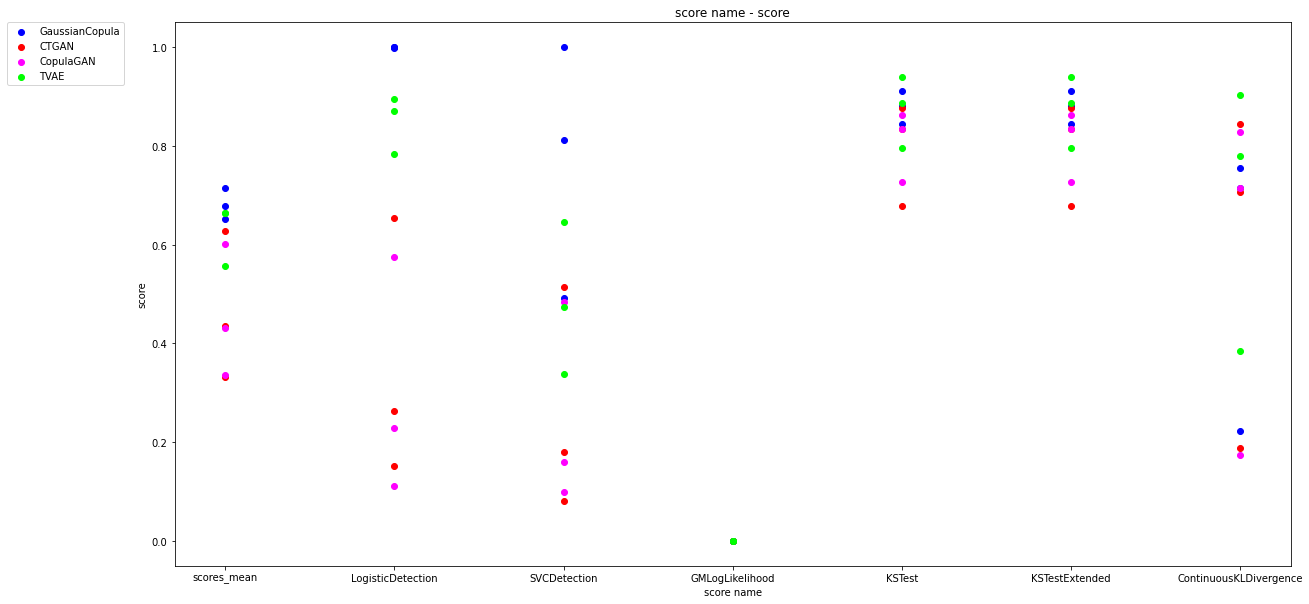

In [103]:
# 各スコアの表
# 
marker_list = ["o","o","o","o"]
marker_list2 = ["x","x","x","x"]
c_list = ["#0000FF","#FF0000","#FF00FF","#00FF00"]

# figごとにまとめる
use_col_list = ["scores_mean","LogisticDetection", "SVCDetection", "GMLogLikelihood","KSTest","KSTestExtended","ContinuousKLDivergence"]


for p in range(len(use_col_list)):
    for i in range(len_models):
        results_row = results_model[i].shape[0]
        if p==0:
            lavel = models_name[i]
        else:
            lavel = None

        plt.scatter(np.array([use_col_list[p] for x in range(results_row)]), results_model[i][use_col_list[p]],
                label=lavel, \
                    marker=marker_list[i],c=c_list[i])

plt.title("score name - score")
plt.xlabel("score name")
plt.ylabel("score")
plt.legend(bbox_to_anchor=(-0.15, 1), loc="upper left",borderaxespad=0)


plt.rcParams["figure.figsize"]=[20,10]
#plt.show()
plt.savefig(fig_path+"many_score.png", format="png",dpi=300)


In [104]:
results.dropna(how="all",axis=1)

,model,use_data,row_num,col_num,fit_time,data_kind,raw_r2/accuracy_Logistic/Linear,new_r2/accuracy_Logistic/Linear,raw_r2/accuracy_GradientBoosting,new_r2/accuracy_GradientBoosting,scores_mean,LogisticDetection,SVCDetection,GMLogLikelihood,KSTest,KSTestExtended,ContinuousKLDivergence,amount_of_data
0,GaussianCopula,molecular_biology_promoters,79,58,12.758768,B,0.888889,0.851852,0.962963,0.740741,0.714686,1.000000,0.811966,7.096625e-51,0.881275,0.881275,0.713599,4582
1,CTGAN,molecular_biology_promoters,79,58,20.371866,B,0.888889,0.481481,0.962963,0.555556,0.435242,0.152896,0.081708,0.000000e+00,0.834788,0.834788,0.707270,4582
2,CopulaGAN,molecular_biology_promoters,79,58,26.163167,B,0.888889,0.296296,0.962963,0.333333,0.432103,0.112243,0.098985,0.000000e+00,0.833915,0.833915,0.713561,4582
3,TVAE,molecular_biology_promoters,79,58,11.068744,B,0.888889,0.777778,0.962963,0.666667,0.663022,0.782563,0.646048,3.387161e-46,0.885639,0.885639,0.778244,4582
4,GaussianCopula,car,1296,7,1.973522,M,0.675926,0.548611,0.988426,0.393519,0.677723,0.997814,0.492230,0.000000e+00,0.910163,0.910163,0.755968,9072
5,CTGAN,car,1296,7,6.647193,M,0.675926,0.717593,0.986111,0.710648,0.627353,0.654276,0.513530,0.000000e+00,0.876653,0.876653,0.843007,9072
6,CopulaGAN,car,1296,7,8.705774,M,0.675926,0.717593,0.986111,0.703704,0.601710,0.575628,0.483148,0.000000e+00,0.861772,0.861772,0.827937,9072
7,TVAE,car,1296,7,6.488166,M,0.675926,0.712963,0.986111,0.745370,0.664751,0.871044,0.337556,0.000000e+00,0.938382,0.938382,0.903142,9072
8,GaussianCopula,542_pollution,45,16,2.957007,R,0.651648,0.667001,0.597618,0.321824,0.651344,1.000000,1.000000,2.777596e-290,0.843056,0.843056,0.221951,720
9,CTGAN,542_pollution,45,16,5.139189,R,0.651648,-0.474754,0.597064,-0.132512,0.331320,0.263704,0.180741,0.000000e+00,0.677778,0.677778,0.187919,720
